# Livrable 1 : Pre-processing

## Sommaire
- Contexte
- Introduction
- Fonctions utilisées
    - Code de suppression de bruit
        - Uniform blur
        - Gaussian blur
        - MlMean
        - Median filter
    - Code d'affutage
        - ImageEnhance
        - Sobel
        - Canny
        - Fourier
        - Laplacian
        - Mexican hat 
        
- Étude de cas
    - Suppression de bruit
    - Affutage d'image
- Explication des compromis
- Conclusion

## Contexte

TouNum est une entreprise spécialisée dans la numérisation de documents. Cette entreprise propose des services aux entreprises souhaitant numériser leurs documents papiers. 

À la suite d’une hausse des demandes, TouNum souhaite inclure du Machine Learning dans ses algorithmes afin de pouvoir traiter une plus grande quantité de données, mais aussi de pouvoir proposer à ses clients un service de catégorisation automatique.

Cette entreprise a donc fait appel à des spécialistes en Data Science du CESI pour proposer un prototype de la solution de catégorisation automatique aussi appelé « image captionning ».

## Introduction

L’implémentation d’une solution d’image captionning nécessite de faire différents traitements sur les images afin de fonctionner correctement. Nous avons prévu de suivre une architecture comme illustrée sur le schéma ci-dessous.

L’architecture précédente est composée de plusieurs modules. Le premier module n’est autre que la chargement des images en mémoire. Lorsque les images sont chargés, un premier traitement sera effectué pour vérifier que l’image est une photo et non un schéma (par exemple). Le troisième module effectuera un traitement pour débruiter et affuter l’image afin d’optimiser les performances du dernier module qui permettra d’obtenir une description de l’image.

Dans ce notebook, nous allons traiter la partie « pré-traitement » des images (en rouge sur le schéma ci-dessus) qui consiste à réduire le bruit et affuter les images données. Ces traitements peuvent cependant avoir un cout : l’augmentation de bruit lors de l’affutage l’une image ou la perte de détails lors de la réduction de bruit sur une image.

De nombreux algorithmes permettent d’effectuer de tels traitements, dans ce notebook, nous expérimentons donc plusieurs méthodes pour en déduire lesquelles sont les plus pertinente à utiliser dans une solution de captionning. 

### Fonctions utilisées

Cette partie présente les fonctions utilisées dans ce notebook. Pour voir leurs applications, merci de vous référez à la partie "Étude de cas"

In [18]:
# compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import skimage
from scipy import misc
from scipy import ndimage
from os import listdir
from os.path import isfile, join
import math
import imageio
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# afficher les figures directement dans le notebook
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#### Chargement des images

In [22]:
def load_images(folder, nb_images) :
    #List containing the loaded images
    img_list = []
    #Iterate as many time as the number of images we want
    for i in range(nb_images) :
        #Load image
        load_image(folder, 1+i)
        #Add it the the list
        img_list.append(img)
    return img_list

def load_image(folder, id_image) :
    #go to the right path
    folder = join("dataset", "livrable1", folder)
    folder_path = join(os.getcwd(), folder)
    #list files in folder
    files = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    #Load image
    return imageio.imread(join(folder_path, files[id_image-1]))

#### Affichage des images

In [23]:
def disp_img(images, rows = 1, h=30, w=20, cmap = 'viridis') :
    fig=plt.figure(figsize=(h, w))
    columns = math.ceil(len(images)/rows)    
    spec = gridspec.GridSpec(ncols=columns, nrows=rows, figure=fig)
    for i in range(0, len(images)):
        img = images[i]
        fig.add_subplot(spec[math.floor(i/columns), i%columns])
        plt.axis('off')
        plt.imshow(img, cmap = cmap)
    plt.show()

####  Suppression du bruit

1. Flou uniforme

In [ ]:
#code

explication

2. Flou gaussien

In [ ]:
#gaussian blur

expl gaussian blur

3. MlMean

In [ ]:
#mlmean

expl m1mean

4. Filtre median

In [ ]:
#median

expl median

#### Affutage de l'image

1. Filtre canny

In [ ]:
#canny

expl canny

2. Filtre de Sobel

In [ ]:
#sobel

expl sobel

3. Librairie ImageEnhance

In [ ]:
#image enhance

expl img enhance ... on en a une ?

4. Transformé de Fourier

In [ ]:
#fourier

expl fourier

5. Filtres laplacien

In [ ]:
#laplacians (diff versions)

In [ ]:
expl laplacians

6. Filtre du chapeau Mexicain

In [ ]:
#mexican hat

expl mexican hat

## Étude de cas

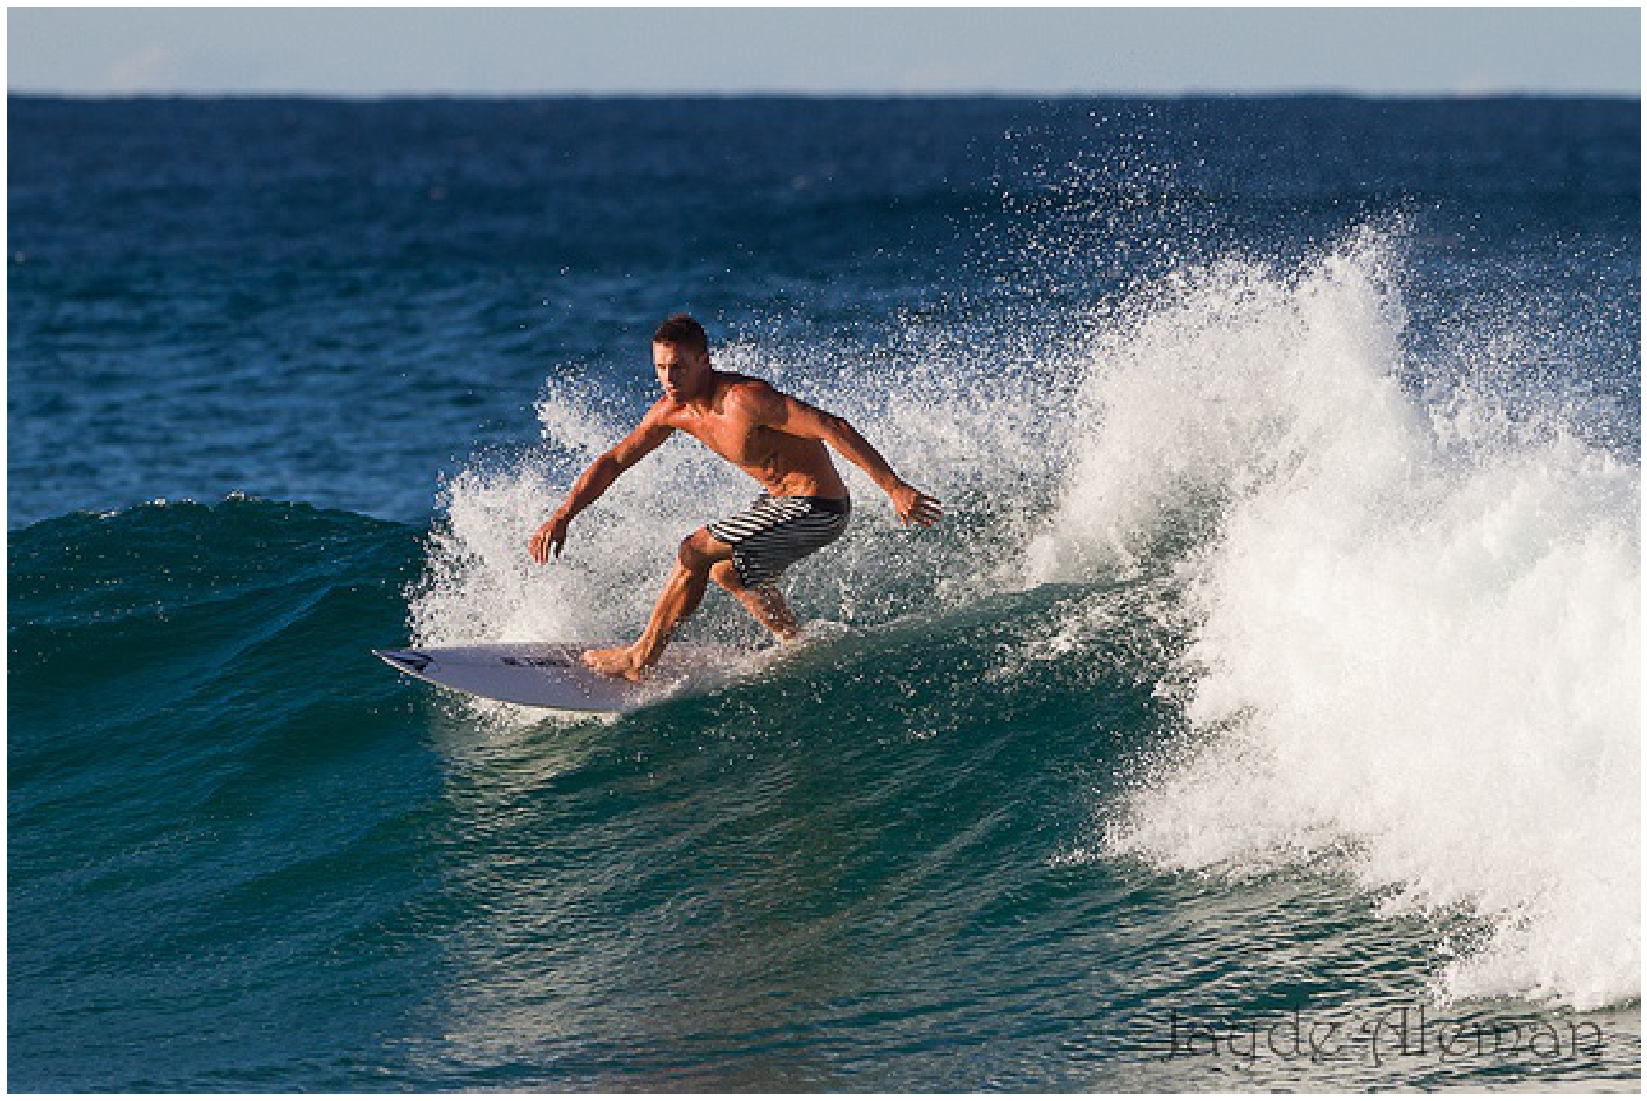

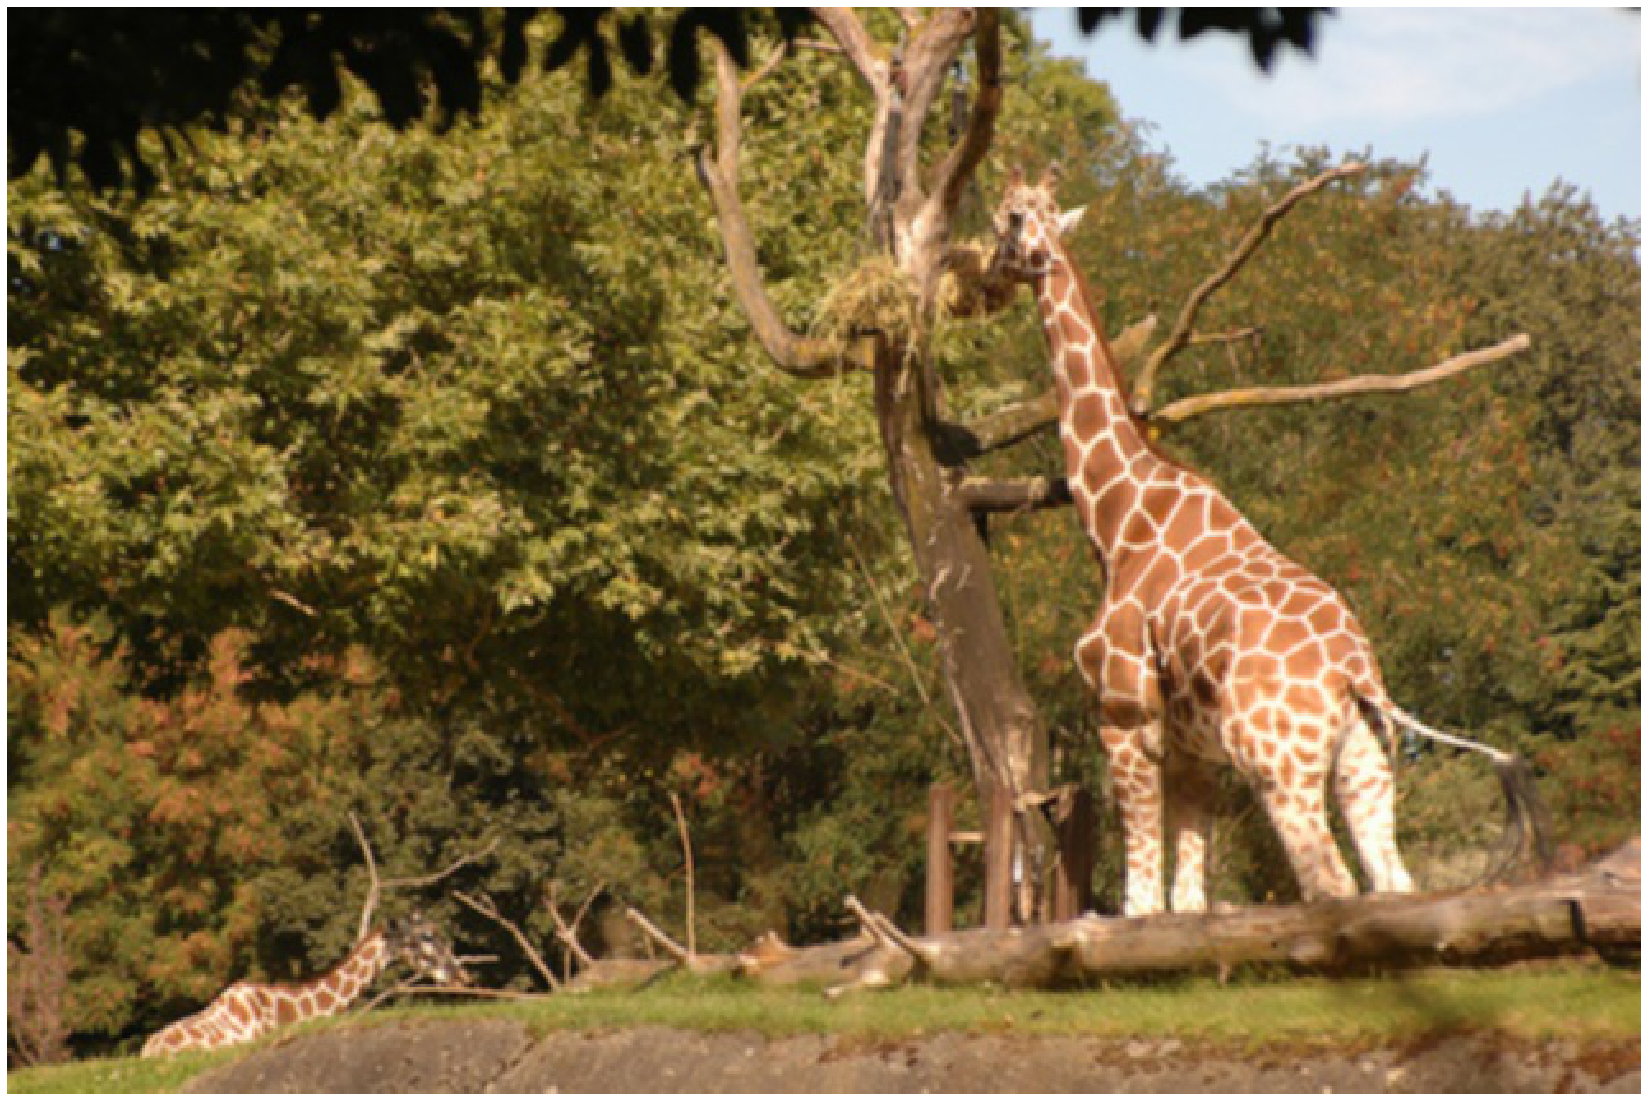

In [26]:
img = load_image("Noisy", 1)
disp_img([img])
img = load_image("Blurry", 1)
disp_img([img])

### Réduction de bruit

In [ ]:
#uniform blur

dire qu'on perd beaucoup de détails

In [ ]:
#gaussian blur et on montre img, blurred, diff

Dire qu'on supprime le bruit et les détails très fins

In [ ]:
#mlmean et on montre img,blurred,diff

#### Comparaison

Une métrique naïve serait de sum le contenu des 2 diff et les comparer. Plus le chiffre est élevé plus il a y eu des détails et du bruit de retiré

In [ ]:
#sum

On peut aussi comparer à l'oeil sur un petit échantillon d'images

Plutôt qu'une comparaison de toute les techniques à la fois, nous allons dans un premier temps comparer le flou uniforme et le flou gaussien car nous allons voir que le flou gaussien est toujours supérieur. On pourra donc par la suite exclure le filtre uniforme de la comparaison.

In [ ]:
#code qui compare uniform et gaussian sur 3 images

Puisque le filtre Gaussien accorde plus d'importance au pixel d'origine il conserve mieux les contours tout en réduisant le bruit.

On peut maintenant comparer le filtre gaussien avec celui MlMean

In [6]:
#code qui compare uniform et gaussian sur 3 images

Commenter le résultat

Il semble donc que le filtre Gaussien soit le plus approprié pour atteindre le juste milieu entre réduire le bruit et maintenir les contours

### Affuter l'image

blabla affuter c'est bien mais ça ajoute du bruit

Il existe de nombreux traitements possibles pour faire ressortir les contours d'une image. Nous avons ici testé les plus populaires

1. Filtre canny

In [ ]:
#canny

commentaire

2. Filtre de Sobel

In [ ]:
#sobel

commentaire

3. Librairie ImageEnhance

In [ ]:
#image enhance

commentaire

4. Transformé de Fourier

In [ ]:
#fourier

commentaire

5. Filtres laplacien

In [ ]:
#laplacians (diff versions)

In [ ]:
commentaire

6. Filtre du chapeau Mexicain

In [ ]:
#mexican hat

commentaire

### Explication des compromis

### Conclusion

Après avoir testé plusieur méthodes de suppréssion de bruit et d'affutage des images nous avons déterminé pour chacune de ces 2 catégories la méthode ayant le meilleur compromis entre création/suppression de bruit et ajustement/floutage de l'image.

Puisque les images que nous devront traiter par la suite ne seront pas soit toutes déjà floues ou toutes très bruitées nous devons appliquer ces 2 traitements.

La première étape de la méthode que nous avons retenu pour affuter l'image, le filtre en chapeau Mexicain, consiste justement à flouter l'image pour en réduire le bruit. Nous proposons donc d'utiliser la méthode de floutage que nous avons précédement jugé comme la plus appropriée auparavant, à savoir le flou Gaussien avec un kernel de 3x3. 

Afin d'automatiser le pre-processing des images nous pouvons enfin regrouper tous ces traitements dans un pipeline :

In [ ]:
#pipeline

Avec ce pipeline nous pouvons maintenant automatiquement traiter les images actuelles ou celle d'un nouveau jeu de donné pour la prochaine étape qui est le choix du modèle. 